In [105]:
import sys
sys.path.append('../Codes/library/')
sys.path.append('../Codes/Python/')
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
import scipy.special as sc
import pandas as pd
from tqdm import tqdm
from Immuno_models import*
import warnings
warnings.filterwarnings('ignore')
N_A = 6.02214076e23
Text_files_path = '/Users/robertomorantovar/Dropbox/Research/Evolution_Immune_System/Text_files/'

%autosave 60

Autosaving every 60 seconds


['C' 'M' 'F' 'I' 'L' 'V' 'W' 'Y' 'A' 'G' 'T' 'S' 'Q' 'N' 'E' 'D' 'H' 'R'
 'K' 'P']


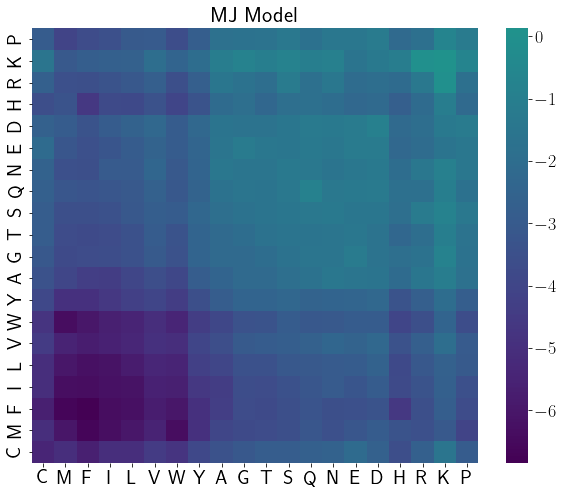

In [2]:
Matrix = 'BLOSUM62'
Matrix = 'MJ2'

fig, ax = plt.subplots(figsize=(10,8))


if(Matrix == 'MJ2'):
    M2 = np.loadtxt(Text_files_path + Matrix + '.txt', skiprows= 1, usecols=range(1,21))
    M2_list = M2.tolist()
    Alphabet = np.loadtxt(Text_files_path + 'Alphabet.txt', dtype=bytes, delimiter='\t').astype(str)
    Alphabet_list = Alphabet.tolist()
    plot_energy_matrix(Energy_Matrix=M2_list, Alphabet=Alphabet, title=r'MJ Model', ax = ax)
if(Matrix == 'BLOSUM62'):
    M2 = np.loadtxt(Text_files_path + Matrix + '.txt', skiprows= 1, usecols=range(1,25))
    M2_list = M2.tolist()
    Alphabet = np.array(['A', 'R'  ,'N' , 'D'  ,'C' , 'Q'  ,'E'  ,'G'  ,'H' , 'I'  ,'L'  ,'K'  ,'M' , 'F' , 'P' , 'S'  ,'T' , 'W' , 'Y' , 'V' , 'B' , 'Z'  ,'X',  '*'])
    Alphabet_list = Alphabet.tolist()
    plot_energy_matrix(Energy_Matrix=M2_list, Alphabet=Alphabet, title=r'BLOSUM62 Model', ax = ax)
print(Alphabet)
w, v = LA.eig(M2_list)
L_alphabet = len(Alphabet)
fig.savefig('../Figures/0_Shape_Space/MJ.png')

## Genome files

In [221]:
L = 4
n = 100

## Random peptides

In [222]:
%%time 
energies_r = np.array([])  
for ninemer in tqdm(np.arange(1000000)):
    contributions = np.array([M2[index,:] for index in np.random.randint(0, 20, L)])
    minE = 0
    for i in np.arange(L):
        minE += np.min(contributions[i,:])
    energies_r = np.append(energies_r, minE)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000000/1000000 [03:09<00:00, 5273.08it/s]

CPU times: user 3min 9s, sys: 814 ms, total: 3min 10s
Wall time: 3min 9s


## Viruses

In [223]:
%%time
Influenza_A_data = open(Text_files_path + 'Antigenicity/Influenza_A.faa', 'r')
Influenza_A_data = Influenza_A_data.readlines()
Influenza_A_proteins = ''
for row in Influenza_A_data:
    if list(row)[0]!= '>' :
        Influenza_A_proteins = Influenza_A_proteins + row
Influenza_A_proteins = np.array(list(Influenza_A_proteins))
Influenza_A_proteins = Influenza_A_proteins[Influenza_A_proteins!='\n']

ninemers_Influenza_A = np.array([Influenza_A_proteins[i: i+L] for i in range(len(Influenza_A_proteins)-L)], dtype = object)
energies_Influenza_A = np.array([])
for ninemer in tqdm(ninemers_Influenza_A):
    contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
    minE = 0
    for i in range(L):
        minE += np.min(contributions[i,:])
    energies_Influenza_A = np.append(energies_Influenza_A, minE)
#------------------------------------------------------------------------------------------------------------
SARS_CoV_2_data = open(Text_files_path + 'Antigenicity/SARS-CoV-2.faa','r')
SARS_CoV_2_data = SARS_CoV_2_data.readlines()
SARS_CoV_2_proteins = ''
for row in SARS_CoV_2_data:
    if list(row)[0]!= '>' :
        SARS_CoV_2_proteins = SARS_CoV_2_proteins+row
SARS_CoV_2_proteins = np.array(list(SARS_CoV_2_proteins))
SARS_CoV_2_proteins = SARS_CoV_2_proteins[SARS_CoV_2_proteins!='\n']

ninemers_SARS_CoV_2 = np.array([SARS_CoV_2_proteins[i: i+L] for i in range(len(SARS_CoV_2_proteins)-L)], dtype = object)
energies_SARS_CoV_2 = np.array([])
for ninemer in tqdm(ninemers_SARS_CoV_2):
    contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
    minE = 0
    for i in range(L):
        minE += np.min(contributions[i,:])
    energies_SARS_CoV_2 = np.append(energies_SARS_CoV_2, minE)
#------------------------------------------------------------------------------------------------------------
HIV_data = open(Text_files_path + 'Antigenicity/HIV.faa','r')
HIV_data = HIV_data.readlines()
HIV_proteins = ''
for row in HIV_data:
    if list(row)[0]!= '>' :
        HIV_proteins = HIV_proteins+row
HIV_proteins = np.array(list(HIV_proteins))
HIV_proteins = HIV_proteins[HIV_proteins!='\n']

ninemers_HIV = np.array([HIV_proteins[i: i+L] for i in range(len(HIV_proteins)-L)], dtype = object)
energies_HIV = np.array([])

for ninemer in tqdm(ninemers_HIV):
    contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
    minE = 0
    for i in range(L):
        minE += np.min(contributions[i,:])
    energies_HIV = np.append(energies_HIV, minE)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3754/3754 [00:00<00:00, 40490.08it/s]

CPU times: user 591 ms, sys: 12.2 ms, total: 603 ms
Wall time: 616 ms


## Human

In [224]:
Homo_data = open(Text_files_path + 'Antigenicity/Homo_sapiens.faa', 'r')
Homo_data = Homo_data.readlines()
Homo_proteins = ''
for row in Homo_data:
    if list(row)[0]!= '>' :
        Homo_proteins = Homo_proteins+row
Homo_proteins = np.array(list(Homo_proteins))
Homo_proteins = Homo_proteins[Homo_proteins!='\n']

ninemers_Homo = np.array([Homo_proteins[i: i+L] for i in range(len(Homo_proteins)-L)], dtype = object)
energies_Homo = np.array([])
for ninemer in tqdm(ninemers_Homo[np.random.choice(len(ninemers_Homo), n*len(ninemers_Influenza_A))]):
    if not(np.sum(np.isin(ninemer, ['U', 'X']))):
        contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
        for i in range(L):
            minE += np.min(contributions[i,:])
        energies_Homo = np.append(energies_Homo, minE)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 480300/480300 [00:49<00:00, 9760.56it/s]


## Mus

In [225]:
%%time
Mus_data = open(Text_files_path + 'Antigenicity/Mus_musculus.faa', 'r')
Mus_data = Mus_data.readlines()
Mus_proteins = ''
for row in Mus_data:
    if list(row)[0]!= '>' :
        Mus_proteins = Mus_proteins+row
Mus_proteins = np.array(list(Mus_proteins))
Mus_proteins = Mus_proteins[Mus_proteins!='\n']

ninemers_Mus = np.array([Mus_proteins[i: i+L] for i in range(len(Mus_proteins)-L)], dtype = object)
energies_Mus = np.array([])
for ninemer in tqdm(ninemers_Mus[np.random.choice(len(ninemers_Mus), n*len(ninemers_Influenza_A))]):
    if not(np.sum(np.isin(ninemer, ['U', 'X']))):
        contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
        for i in range(L):
            minE += np.min(contributions[i,:])
        energies_Mus = np.append(energies_Mus, minE)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 480300/480300 [00:49<00:00, 9787.75it/s]

CPU times: user 1min 33s, sys: 16.9 s, total: 1min 50s
Wall time: 2min 1s


## Candida

In [226]:
%%time
Candida_data = open(Text_files_path + 'Antigenicity/Candida_albicans.faa','r')
Candida_data = Candida_data.readlines()
Candida_proteins = ''
for row in Candida_data:
    if list(row)[0]!= '>' :
        Candida_proteins = Candida_proteins+row
Candida_proteins = np.array(list(Candida_proteins))
Candida_proteins = Candida_proteins[Candida_proteins!='\n']

ninemers_Candida = np.array([Candida_proteins[i: i+L] for i in range(len(Candida_proteins)-L)], dtype = object)
energies_Candida = np.array([])

for ninemer in tqdm(ninemers_Candida[np.random.choice(len(ninemers_Candida), n*len(ninemers_Influenza_A))]):
    if not(np.sum(np.isin(ninemer, ['U', 'X', 'J', 'B', 'Z']))):
        contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
        for i in range(L):
            minE += np.min(contributions[i,:])
        energies_Candida = np.append(energies_Candida, minE)
        

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 480300/480300 [00:53<00:00, 9048.24it/s]

CPU times: user 54.9 s, sys: 558 ms, total: 55.4 s
Wall time: 55.5 s


## Plasmodium

In [227]:
%%time
Malaria_data = open(Text_files_path + 'Antigenicity/Plasmodium_falciparum.faa','r')
Malaria_data = Malaria_data.readlines()
Malaria_proteins = ''
for row in Malaria_data:
    if list(row)[0]!= '>' :
        Malaria_proteins = Malaria_proteins+row
Malaria_proteins = np.array(list(Malaria_proteins))
Malaria_proteins = Malaria_proteins[Malaria_proteins!='\n']

ninemers_Malaria = np.array([Malaria_proteins[i: i+L] for i in range(len(Malaria_proteins)-L)], dtype = object)
energies_Malaria = np.array([])

for ninemer in tqdm(ninemers_Malaria[np.random.choice(len(ninemers_Malaria), n*len(ninemers_Influenza_A))]):
    if not(np.sum(np.isin(ninemer, ['U', 'X']))):
        contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
        for i in range(L):
            minE += np.min(contributions[i,:])
        energies_Malaria = np.append(energies_Malaria, minE)
        

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 480300/480300 [00:49<00:00, 9781.26it/s]

CPU times: user 51.7 s, sys: 603 ms, total: 52.3 s
Wall time: 52.6 s


## Bacteria

In [228]:
%%time
Ecoli_data = open(Text_files_path + 'Antigenicity/E_coli.faa','r')
Ecoli_data = Ecoli_data.readlines()
Ecoli_proteins = ''
for row in Ecoli_data:
    if list(row)[0]!= '>' :
        Ecoli_proteins = Ecoli_proteins+row
Ecoli_proteins = np.array(list(Ecoli_proteins))
Ecoli_proteins = Ecoli_proteins[Ecoli_proteins!='\n']

ninemers_Ecoli = np.array([Ecoli_proteins[i: i+L] for i in range(len(Ecoli_proteins)-L)], dtype = object)
energies_Ecoli = np.array([])

for ninemer in tqdm(ninemers_Ecoli[np.random.choice(len(ninemers_Ecoli), n*len(ninemers_Influenza_A))]):
    if not(np.sum(np.isin(ninemer, ['U', 'X']))):
        contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
        for i in range(L):
            minE += np.min(contributions[i,:])
        energies_Ecoli = np.append(energies_Ecoli, minE)
#------------------------------------------------------------------------------------------------------------
Ealbertii_data = open(Text_files_path + 'Antigenicity/Escherichia_albertii.faa','r')
Ealbertii_data = Ealbertii_data.readlines()
Ealbertii_proteins = ''
for row in Ealbertii_data:
    if list(row)[0]!= '>' :
        Ealbertii_proteins = Ealbertii_proteins+row
Ealbertii_proteins = np.array(list(Ealbertii_proteins))
Ealbertii_proteins = Ealbertii_proteins[Ealbertii_proteins!='\n']

ninemers_Ealbertii = np.array([Ealbertii_proteins[i: i+L] for i in range(len(Ealbertii_proteins)-L)], dtype = object)
energies_Ealbertii = np.array([])

for ninemer in tqdm(ninemers_Ealbertii[np.random.choice(len(ninemers_Ealbertii), n*len(ninemers_Influenza_A))]):
    if not(np.sum(np.isin(ninemer, ['U', 'X']))):
        contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
        for i in range(L):
            minE += np.min(contributions[i,:])
        energies_Ealbertii = np.append(energies_Ealbertii, minE)
#------------------------------------------------------------------------------------------------------------        
Vharveyi_data = open(Text_files_path + 'Antigenicity/Vibrio_harveyi.faa','r')
Vharveyi_data = Vharveyi_data.readlines()
Vharveyi_proteins = ''
for row in Vharveyi_data:
    if list(row)[0]!= '>' :
        Vharveyi_proteins = Vharveyi_proteins+row
Vharveyi_proteins = np.array(list(Vharveyi_proteins))
Vharveyi_proteins = Vharveyi_proteins[Vharveyi_proteins!='\n']

ninemers_Vharveyi = np.array([Vharveyi_proteins[i: i+L] for i in range(len(Vharveyi_proteins)-L)], dtype = object)
energies_Vharveyi = np.array([])
for ninemer in tqdm(ninemers_Vharveyi[np.random.choice(len(ninemers_Vharveyi), n*len(ninemers_Influenza_A))]):
    if not(np.sum(np.isin(ninemer, ['U', 'X']))):
        contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
        for i in range(L):
            minE += np.min(contributions[i,:])
        energies_Vharveyi = np.append(energies_Vharveyi, minE)
        

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 480300/480300 [00:48<00:00, 9863.19it/s]

CPU times: user 2min 28s, sys: 931 ms, total: 2min 29s
Wall time: 2min 29s


In [229]:
print('Homo:', len(Homo_proteins))
print('Mus:', len(Mus_proteins))
print('Candida:', len(Candida_proteins))
print('Malaria:', len(Malaria_proteins))
print('Ecoli:', len(Ecoli_proteins))
print('Ealbertii:', len(Ealbertii_proteins))
print('Vharveyi:', len(Vharveyi_proteins))
print('Influenza:', len(Influenza_A_proteins))
print('SARS-CoV-2:', len(SARS_CoV_2_proteins))
print('HIV:', len(HIV_proteins))


Homo: 90213603
Mus: 64410305
Candida: 2979179
Malaria: 4102337
Ecoli: 1329980
Ealbertii: 1337309
Vharveyi: 1665309
Influenza: 4807
SARS-CoV-2: 14149
HIV: 3758


## Plots

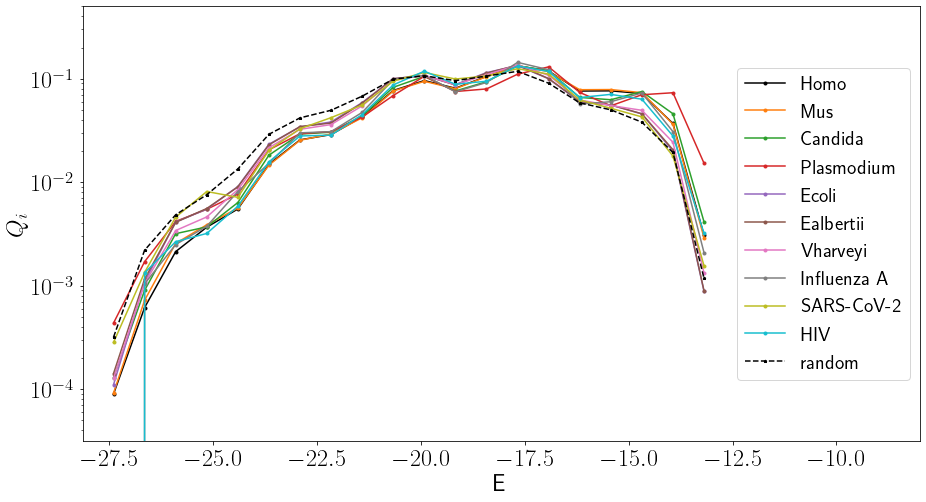

In [239]:
fig, ax = plt.subplots(figsize=(15,8))
data = ax.hist([energies_Homo, energies_Mus, energies_Candida, energies_Malaria, energies_Ecoli, energies_Ealbertii, energies_Vharveyi, energies_Influenza_A, energies_SARS_CoV_2, energies_HIV,  energies_r], bins = 20, density = False,  alpha = 0)
data[0][0] = data[0][0]/len(energies_Homo)
data[0][1] = data[0][1]/len(energies_Mus)
data[0][2] = data[0][2]/len(energies_Candida)
data[0][3] = data[0][3]/len(energies_Malaria)
data[0][4] = data[0][4]/len(energies_Ecoli)
data[0][5] = data[0][5]/len(energies_Ealbertii)
data[0][6] = data[0][6]/len(energies_Vharveyi)
data[0][7] = data[0][7]/len(energies_Influenza_A)
data[0][8] = data[0][8]/len(energies_SARS_CoV_2)
data[0][9] = data[0][9]/len(energies_HIV)
data[0][-1] = data[0][-1]/len(energies_r)

ax.plot((data[1][:-1]), data[0][0], linestyle = '-', marker = 'o', label = 'Homo', color = 'black', ms = 3)
ax.plot((data[1][:-1]), data[0][1], linestyle = '-', marker = 'o', label = 'Mus', ms = 3)
ax.plot((data[1][:-1]), data[0][2], linestyle = '-', marker = 'o', label = 'Candida', ms = 3)
ax.plot((data[1][:-1]), data[0][3], linestyle = '-', marker = 'o', label = 'Plasmodium', ms = 3)
ax.plot((data[1][:-1]), data[0][4], linestyle = '-', marker = 'o', label = 'Ecoli', ms = 3)
ax.plot((data[1][:-1]), data[0][5], linestyle = '-', marker = 'o', label = 'Ealbertii', ms = 3)
ax.plot((data[1][:-1]), data[0][6], linestyle = '-', marker = 'o', label = 'Vharveyi', ms = 3)
ax.plot((data[1][:-1]), data[0][7], linestyle = '-', marker = 'o', label = 'Influenza A', ms = 3)
ax.plot((data[1][:-1]), data[0][8], linestyle = '-', marker = 'o', label = 'SARS-CoV-2', ms = 3)
ax.plot((data[1][:-1]), data[0][9], linestyle = '-', marker = 'o', label = 'HIV', ms = 3)
ax.plot((data[1][:-1]), data[0][-1], linestyle = '--', marker = '*', label = 'random', color = 'black', ms = 3)
ax.legend(fontsize = 20, loc = 5);
my_plot_layout(ax=ax, ylabel = r'$Q_i$', xlabel = r'E', yscale = 'log')
ax.set_ylim(top = .5)
ax.set_xlim(right = -8)
fig.savefig('../Figures/8_Antigenicity/first_signature1-%d.pdf'%L)


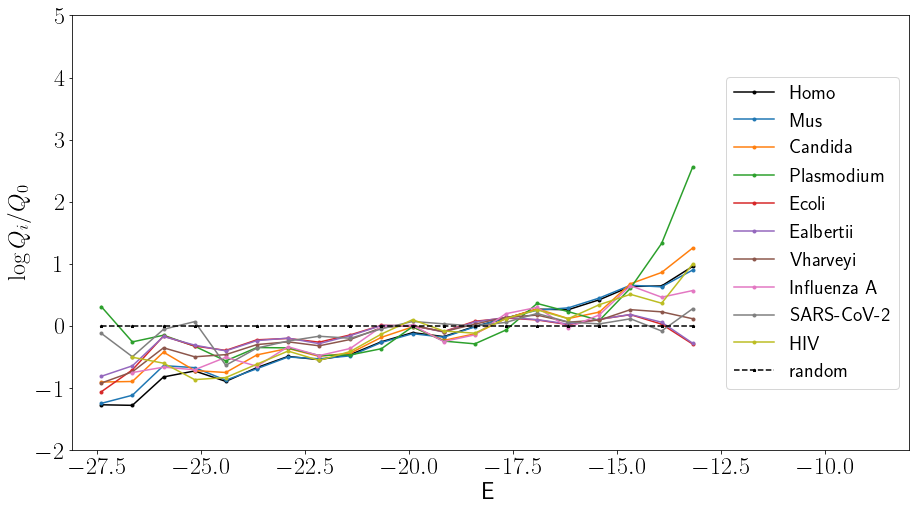

In [240]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot((data[1][:-1]), np.log(data[0][0]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Homo', color = 'black', ms = 3)
ax.plot((data[1][:-1]), np.log(data[0][1]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Mus', ms = 3)
ax.plot((data[1][:-1]), np.log(data[0][2]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Candida', ms = 3)
ax.plot((data[1][:-1]), np.log(data[0][3]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Plasmodium', ms = 3)
ax.plot((data[1][:-1]), np.log(data[0][4]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Ecoli', ms = 3)
ax.plot((data[1][:-1]), np.log(data[0][5]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Ealbertii', ms = 3)
ax.plot((data[1][:-1]), np.log(data[0][6]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Vharveyi', ms = 3)
ax.plot((data[1][:-1]), np.log(data[0][7]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Influenza A', ms = 3)
ax.plot((data[1][:-1]), np.log(data[0][8]/data[0][-1]), linestyle = '-', marker = 'o', label = 'SARS-CoV-2', ms = 3)
ax.plot((data[1][:-1]), np.log(data[0][9]/data[0][-1]), linestyle = '-', marker = 'o', label = 'HIV', ms = 3)
ax.plot((data[1][:-1]), np.log(data[0][-1]/data[0][-1]), linestyle = '--', marker = '*', label = 'random', color = 'black', ms = 3)
ax.legend(fontsize = 20, loc = 5);
my_plot_layout(ax=ax, ylabel = r'$\log{Q_i/Q_0}$', xlabel = r'E')
ax.set_ylim(-2, 5)
ax.set_xlim(right = -8)
fig.savefig('../Figures/8_Antigenicity/first_signature2-%d.pdf'%L)


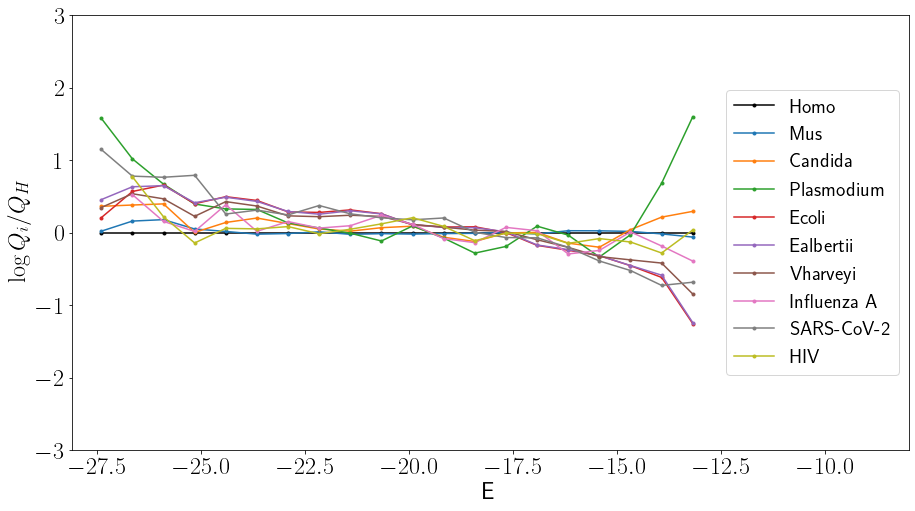

In [241]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot((data[1][:-1]), np.log(data[0][0]/data[0][0]), linestyle = '-', marker = 'o', label = 'Homo', color = 'black', ms = 3)
ax.plot((data[1][:-1]), np.log(data[0][1]/data[0][0]), linestyle = '-', marker = 'o', label = 'Mus', ms = 3)
ax.plot((data[1][:-1]), np.log(data[0][2]/data[0][0]), linestyle = '-', marker = 'o', label = 'Candida', ms = 3)
ax.plot((data[1][:-1]), np.log(data[0][3]/data[0][0]), linestyle = '-', marker = 'o', label = 'Plasmodium', ms = 3)
ax.plot((data[1][:-1]), np.log(data[0][4]/data[0][0]), linestyle = '-', marker = 'o', label = 'Ecoli', ms = 3)
ax.plot((data[1][:-1]), np.log(data[0][5]/data[0][0]), linestyle = '-', marker = 'o', label = 'Ealbertii', ms = 3)
ax.plot((data[1][:-1]), np.log(data[0][6]/data[0][0]), linestyle = '-', marker = 'o', label = 'Vharveyi', ms = 3)
ax.plot((data[1][:-1]), np.log(data[0][7]/data[0][0]), linestyle = '-', marker = 'o', label = 'Influenza A', ms = 3)
ax.plot((data[1][:-1]), np.log(data[0][8]/data[0][0]), linestyle = '-', marker = 'o', label = 'SARS-CoV-2', ms = 3)
ax.plot((data[1][:-1]), np.log(data[0][9]/data[0][0]), linestyle = '-', marker = 'o', label = 'HIV', ms = 3)
ax.legend(fontsize = 20, loc = 5);
my_plot_layout(ax=ax, ylabel = r'$\log{Q_i/Q_H}$', xlabel = r'E')
ax.set_ylim(-3, 3)
ax.set_xlim(right = -8)
fig.savefig('../Figures/8_Antigenicity/first_signature3-%d.pdf'%L)


# L = 15

In [384]:
%%time
L=15
ninemers_Ecoli = np.array([Ecoli_proteins[i: i+L] for i in range(len(Ecoli_proteins)-L)], dtype = object)
energies_Ecoli = np.array([])

ninemers_Malaria = np.array([Malaria_proteins[i: i+L] for i in range(len(Malaria_proteins)-L)], dtype = object)
energies_Malaria = np.array([])

ninemers_Mus = np.array([Mus_proteins[i: i+L] for i in range(len(Mus_proteins)-L)], dtype = object)
energies_Mus = np.array([])

ninemers_Homo = np.array([Homo_proteins[i: i+L] for i in range(len(Homo_proteins)-L)], dtype = object)
energies_Homo = np.array([])

for ninemer in ninemers_Malaria[np.random.choice(len(ninemers_Malaria), 10*len(ninemers_Influenza_A))]:
    if not(np.sum(np.isin(ninemer, ['U', 'X']))):
        contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
        for i in range(L):
            minE += np.min(contributions[i,:])
        energies_Malaria = np.append(energies_Malaria, minE)
        
for ninemer in ninemers_Ecoli[np.random.choice(len(ninemers_Ecoli), 10*len(ninemers_Influenza_A))]:
    if not(np.sum(np.isin(ninemer, ['U', 'X']))):
        contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
        for i in range(L):
            minE += np.min(contributions[i,:])
        energies_Ecoli = np.append(energies_Ecoli, minE)
        
for ninemer in ninemers_Mus[np.random.choice(len(ninemers_Mus), 10*len(ninemers_Influenza_A))]:
    if not(np.sum(np.isin(ninemer, ['U', 'X']))):
        contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
        for i in range(L):
            minE += np.min(contributions[i,:])
        energies_Mus = np.append(energies_Mus, minE)
        
for ninemer in ninemers_Homo[np.random.choice(len(ninemers_Homo), 10*len(ninemers_Influenza_A))]:
    if not(np.sum(np.isin(ninemer, ['U', 'X']))):
        contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
        for i in range(L):
            minE += np.min(contributions[i,:])
        energies_Homo = np.append(energies_Homo, minE)

CPU times: user 2min 49s, sys: 38.4 s, total: 3min 27s
Wall time: 4min 20s


In [385]:
%%time
ninemers_Influenza_A = np.array([Influenza_A_proteins[i: i+L] for i in range(len(Influenza_A_proteins)-L)], dtype = object)
energies_Influenza_A = np.array([])
ninemers_SARS_CoV_2 = np.array([SARS_CoV_2_proteins[i: i+L] for i in range(len(SARS_CoV_2_proteins)-L)], dtype = object)
energies_SARS_CoV_2 = np.array([])
ninemers_HIV = np.array([HIV_proteins[i: i+L] for i in range(len(HIV_proteins)-L)], dtype = object)
energies_HIV = np.array([])

for ninemer in ninemers_Influenza_A:
    contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
    minE = 0
    for i in range(L):
        minE += np.min(contributions[i,:])
    energies_Influenza_A = np.append(energies_Influenza_A, minE)

for ninemer in ninemers_SARS_CoV_2:
    contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
    minE = 0
    for i in range(L):
        minE += np.min(contributions[i,:])
    energies_SARS_CoV_2 = np.append(energies_SARS_CoV_2, minE)
    
for ninemer in ninemers_HIV:#[np.random.choice(len(ninemers_HIV), len(ninemers_Influenza_A))]:
    contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
    minE = 0
    for i in range(L):
        minE += np.min(contributions[i,:])
    energies_HIV = np.append(energies_HIV, minE)


CPU times: user 2.65 s, sys: 24.5 ms, total: 2.68 s
Wall time: 2.72 s


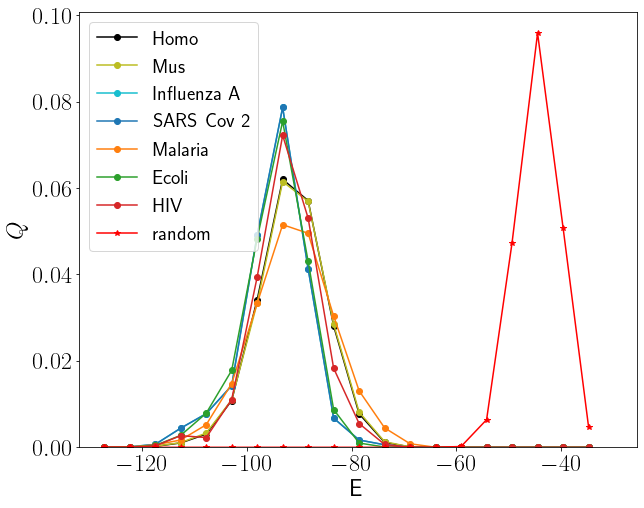

In [386]:
fig, ax = plt.subplots(figsize=(10,8))
data = ax.hist([energies_Homo, energies_Mus, energies_Influenza_A, energies_SARS_CoV_2,  energies_Malaria, energies_Ecoli, energies_HIV,  energies_r], bins = 20, density = True,  alpha = 0)
ax.plot((data[1][:-1]), data[0][0], linestyle = '-', marker = 'o', label = 'Homo', color = 'black')
ax.plot((data[1][:-1]), data[0][1], linestyle = '-', marker = 'o', label = 'Mus')
ax.plot((data[1][:-1]), data[0][2], linestyle = '-', marker = 'o', label = 'Influenza A')
ax.plot((data[1][:-1]), data[0][3], linestyle = '-', marker = 'o', label = 'SARS Cov 2')
ax.plot((data[1][:-1]), data[0][4], linestyle = '-', marker = 'o', label = 'Malaria')
ax.plot((data[1][:-1]), data[0][5], linestyle = '-', marker = 'o', label = 'Ecoli')
ax.plot((data[1][:-1]), data[0][6], linestyle = '-', marker = 'o', label = 'HIV')
ax.plot((data[1][:-1]), data[0][-1], linestyle = '-', marker = '*', label = 'random', color = 'red')
ax.legend(fontsize = 20);
my_plot_layout(ax=ax, ylabel = r'$Q$', xlabel = r'E')
fig.savefig('../Figures/8_Antigenicity/first_signature1_20.pdf')


/var/folders/lj/3gwj0t1s2dgclxf1cbs0_nkc0000gp/T/ipykernel_29525/4039570196.py:2: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot((data[1][:-1]), np.log(data[0][0]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Homo', color = 'black')
/var/folders/lj/3gwj0t1s2dgclxf1cbs0_nkc0000gp/T/ipykernel_29525/4039570196.py:2: RuntimeWarning: invalid value encountered in true_divide
  ax.plot((data[1][:-1]), np.log(data[0][0]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Homo', color = 'black')
/var/folders/lj/3gwj0t1s2dgclxf1cbs0_nkc0000gp/T/ipykernel_29525/4039570196.py:2: RuntimeWarning: divide by zero encountered in log
  ax.plot((data[1][:-1]), np.log(data[0][0]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Homo', color = 'black')
/var/folders/lj/3gwj0t1s2dgclxf1cbs0_nkc0000gp/T/ipykernel_29525/4039570196.py:3: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot((data[1][:-1]), np.log(data[0][1]/data[0][-1]), linestyle = '-', marker =

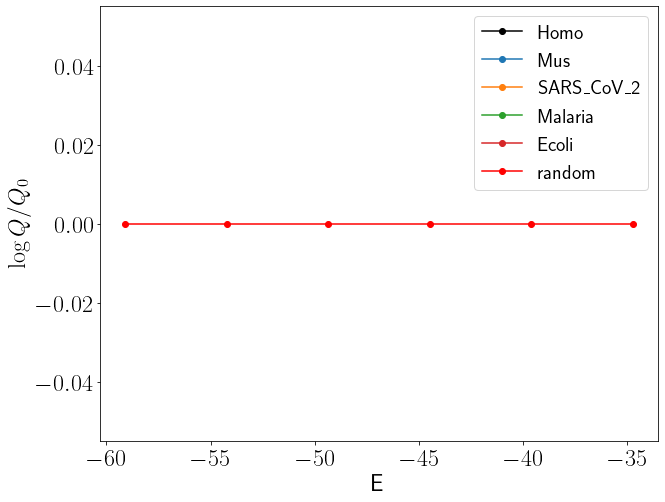

In [387]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot((data[1][:-1]), np.log(data[0][0]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Homo', color = 'black')
ax.plot((data[1][:-1]), np.log(data[0][1]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Mus')
#ax.plot((data[1][:-1]), np.log(data[0][2]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Influenza A')
ax.plot((data[1][:-1]), np.log(data[0][3]/data[0][-1]), linestyle = '-', marker = 'o', label = 'SARS_CoV_2')
ax.plot((data[1][:-1]), np.log(data[0][4]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Malaria')
ax.plot((data[1][:-1]), np.log(data[0][5]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Ecoli')
#ax.plot((data[1][:-1]), np.log(data[0][6]/data[0][-1]), linestyle = '-', marker = 'o', label = 'HIV')
ax.plot((data[1][:-1]), np.log(data[0][-1]/data[0][-1]), linestyle = '-', marker = 'o', label = 'random', color = 'red')
ax.legend(fontsize = 20);
my_plot_layout(ax=ax, ylabel = r'$\log{Q/Q_0}$', xlabel = r'E')
fig.savefig('../Figures/8_Antigenicity/first_signature2_20.pdf')


/var/folders/lj/3gwj0t1s2dgclxf1cbs0_nkc0000gp/T/ipykernel_29525/223626937.py:2: RuntimeWarning: invalid value encountered in true_divide
  ax.plot((data[1][:-1]), np.log(data[0][0]/data[0][0]), linestyle = '-', marker = 'o', label = 'Human/Human',color='black')
/var/folders/lj/3gwj0t1s2dgclxf1cbs0_nkc0000gp/T/ipykernel_29525/223626937.py:3: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot((data[1][:-1]), np.log(data[0][1]/data[0][0]), linestyle = '-', marker = 'o', label = 'Mus/Human')
/var/folders/lj/3gwj0t1s2dgclxf1cbs0_nkc0000gp/T/ipykernel_29525/223626937.py:3: RuntimeWarning: invalid value encountered in true_divide
  ax.plot((data[1][:-1]), np.log(data[0][1]/data[0][0]), linestyle = '-', marker = 'o', label = 'Mus/Human')
/var/folders/lj/3gwj0t1s2dgclxf1cbs0_nkc0000gp/T/ipykernel_29525/223626937.py:5: RuntimeWarning: invalid value encountered in true_divide
  ax.plot((data[1][:-1]), np.log(data[0][3]/data[0][0]), linestyle = '-', marker = 'o', label = 'SARS-Co

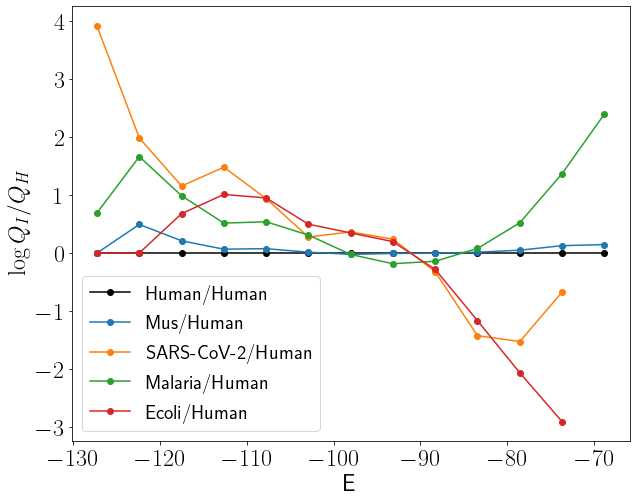

In [388]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot((data[1][:-1]), np.log(data[0][0]/data[0][0]), linestyle = '-', marker = 'o', label = 'Human/Human',color='black')
ax.plot((data[1][:-1]), np.log(data[0][1]/data[0][0]), linestyle = '-', marker = 'o', label = 'Mus/Human')
#ax.plot((data[1][:-1]), np.log(data[0][2]/data[0][0]), linestyle = '-', marker = 'o', label = 'Influenza A/Human')
ax.plot((data[1][:-1]), np.log(data[0][3]/data[0][0]), linestyle = '-', marker = 'o', label = 'SARS-CoV-2/Human')
ax.plot((data[1][:-1]), np.log(data[0][4]/data[0][0]), linestyle = '-', marker = 'o', label = 'Malaria/Human')
ax.plot((data[1][:-1]), np.log(data[0][5]/data[0][0]), linestyle = '-', marker = 'o', label = 'Ecoli/Human')
#ax.plot((data[1][:-1]), np.log(data[0][6]/data[0][0]), linestyle = '-', marker = 'o', label = 'HIV/Human')
ax.legend(fontsize = 20);
my_plot_layout(ax=ax, ylabel = r'$\log{Q_I/Q_H}$', xlabel = r'E')
fig.savefig('../Figures/8_Antigenicity/first_signature3_20.pdf')


# L = 5

In [389]:
%%time
L=5
ninemers_Ecoli = np.array([Ecoli_proteins[i: i+L] for i in range(len(Ecoli_proteins)-L)], dtype = object)
energies_Ecoli = np.array([])

ninemers_Malaria = np.array([Malaria_proteins[i: i+L] for i in range(len(Malaria_proteins)-L)], dtype = object)
energies_Malaria = np.array([])

ninemers_Mus = np.array([Mus_proteins[i: i+L] for i in range(len(Mus_proteins)-L)], dtype = object)
energies_Mus = np.array([])

ninemers_Homo = np.array([Homo_proteins[i: i+L] for i in range(len(Homo_proteins)-L)], dtype = object)
energies_Homo = np.array([])

for ninemer in ninemers_Malaria[np.random.choice(len(ninemers_Malaria), 10*len(ninemers_Influenza_A))]:
    if not(np.sum(np.isin(ninemer, ['U', 'X']))):
        contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
        for i in range(L):
            minE += np.min(contributions[i,:])
        energies_Malaria = np.append(energies_Malaria, minE)
        
for ninemer in ninemers_Ecoli[np.random.choice(len(ninemers_Ecoli), 10*len(ninemers_Influenza_A))]:
    if not(np.sum(np.isin(ninemer, ['U', 'X']))):
        contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
        for i in range(L):
            minE += np.min(contributions[i,:])
        energies_Ecoli = np.append(energies_Ecoli, minE)
        
for ninemer in ninemers_Mus[np.random.choice(len(ninemers_Mus), 10*len(ninemers_Influenza_A))]:
    if not(np.sum(np.isin(ninemer, ['U', 'X']))):
        contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
        for i in range(L):
            minE += np.min(contributions[i,:])
        energies_Mus = np.append(energies_Mus, minE)
        
for ninemer in ninemers_Homo[np.random.choice(len(ninemers_Homo), 10*len(ninemers_Influenza_A))]:
    if not(np.sum(np.isin(ninemer, ['U', 'X']))):
        contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
        minE = 0
        for i in range(L):
            minE += np.min(contributions[i,:])
        energies_Homo = np.append(energies_Homo, minE)

KeyboardInterrupt: 

In [390]:
%%time
ninemers_Influenza_A = np.array([Influenza_A_proteins[i: i+L] for i in range(len(Influenza_A_proteins)-L)], dtype = object)
energies_Influenza_A = np.array([])
ninemers_SARS_CoV_2 = np.array([SARS_CoV_2_proteins[i: i+L] for i in range(len(SARS_CoV_2_proteins)-L)], dtype = object)
energies_SARS_CoV_2 = np.array([])
ninemers_HIV = np.array([HIV_proteins[i: i+L] for i in range(len(HIV_proteins)-L)], dtype = object)
energies_HIV = np.array([])

for ninemer in ninemers_Influenza_A:
    contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
    minE = 0
    for i in range(L):
        minE += np.min(contributions[i,:])
    energies_Influenza_A = np.append(energies_Influenza_A, minE)

for ninemer in ninemers_SARS_CoV_2:
    contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
    minE = 0
    for i in range(L):
        minE += np.min(contributions[i,:])
    energies_SARS_CoV_2 = np.append(energies_SARS_CoV_2, minE)
    
for ninemer in ninemers_HIV:#[np.random.choice(len(ninemers_HIV), len(ninemers_Influenza_A))]:
    contributions = np.array([M2[index,:] for index in [Alphabet_list.index(j) for j in ninemer]])
    minE = 0
    for i in range(L):
        minE += np.min(contributions[i,:])
    energies_HIV = np.append(energies_HIV, minE)


CPU times: user 898 ms, sys: 18.2 ms, total: 916 ms
Wall time: 926 ms


/Users/robertomorantovar/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


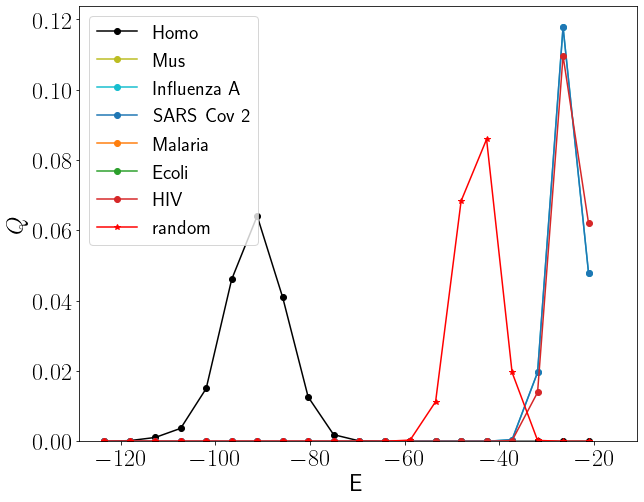

In [391]:
fig, ax = plt.subplots(figsize=(10,8))
data = ax.hist([energies_Homo, energies_Mus, energies_Influenza_A, energies_SARS_CoV_2,  energies_Malaria, energies_Ecoli, energies_HIV,  energies_r], bins = 20, density = True,  alpha = 0)
ax.plot((data[1][:-1]), data[0][0], linestyle = '-', marker = 'o', label = 'Homo', color = 'black')
ax.plot((data[1][:-1]), data[0][1], linestyle = '-', marker = 'o', label = 'Mus')
ax.plot((data[1][:-1]), data[0][2], linestyle = '-', marker = 'o', label = 'Influenza A')
ax.plot((data[1][:-1]), data[0][3], linestyle = '-', marker = 'o', label = 'SARS Cov 2')
ax.plot((data[1][:-1]), data[0][4], linestyle = '-', marker = 'o', label = 'Malaria')
ax.plot((data[1][:-1]), data[0][5], linestyle = '-', marker = 'o', label = 'Ecoli')
ax.plot((data[1][:-1]), data[0][6], linestyle = '-', marker = 'o', label = 'HIV')
ax.plot((data[1][:-1]), data[0][-1], linestyle = '-', marker = '*', label = 'random', color = 'red')
ax.legend(fontsize = 20);
my_plot_layout(ax=ax, ylabel = r'$Q$', xlabel = r'E')
fig.savefig('../Figures/8_Antigenicity/first_signature1_5.pdf')


/var/folders/lj/3gwj0t1s2dgclxf1cbs0_nkc0000gp/T/ipykernel_29525/2097818858.py:2: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot((data[1][:-1]), np.log(data[0][0]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Homo', color = 'black')
/var/folders/lj/3gwj0t1s2dgclxf1cbs0_nkc0000gp/T/ipykernel_29525/2097818858.py:2: RuntimeWarning: invalid value encountered in true_divide
  ax.plot((data[1][:-1]), np.log(data[0][0]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Homo', color = 'black')
/var/folders/lj/3gwj0t1s2dgclxf1cbs0_nkc0000gp/T/ipykernel_29525/2097818858.py:2: RuntimeWarning: divide by zero encountered in log
  ax.plot((data[1][:-1]), np.log(data[0][0]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Homo', color = 'black')
/var/folders/lj/3gwj0t1s2dgclxf1cbs0_nkc0000gp/T/ipykernel_29525/2097818858.py:5: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot((data[1][:-1]), np.log(data[0][3]/data[0][-1]), linestyle = '-', marker =

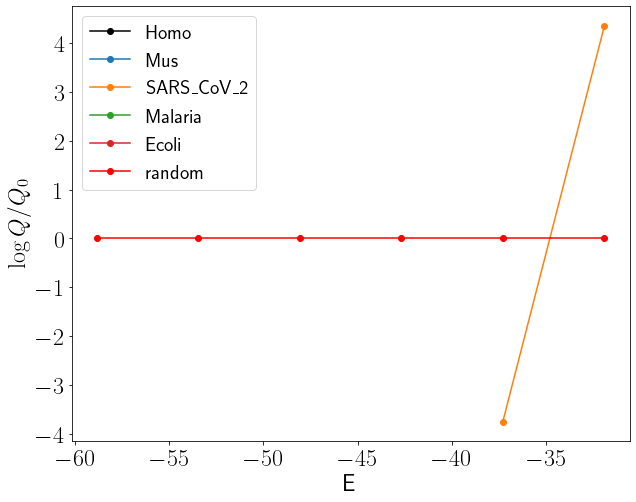

In [392]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot((data[1][:-1]), np.log(data[0][0]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Homo', color = 'black')
ax.plot((data[1][:-1]), np.log(data[0][1]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Mus')
#ax.plot((data[1][:-1]), np.log(data[0][2]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Influenza A')
ax.plot((data[1][:-1]), np.log(data[0][3]/data[0][-1]), linestyle = '-', marker = 'o', label = 'SARS_CoV_2')
ax.plot((data[1][:-1]), np.log(data[0][4]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Malaria')
ax.plot((data[1][:-1]), np.log(data[0][5]/data[0][-1]), linestyle = '-', marker = 'o', label = 'Ecoli')
#ax.plot((data[1][:-1]), np.log(data[0][6]/data[0][-1]), linestyle = '-', marker = 'o', label = 'HIV')
ax.plot((data[1][:-1]), np.log(data[0][-1]/data[0][-1]), linestyle = '-', marker = 'o', label = 'random', color = 'red')
ax.legend(fontsize = 20);
my_plot_layout(ax=ax, ylabel = r'$\log{Q/Q_0}$', xlabel = r'E')
fig.savefig('../Figures/8_Antigenicity/first_signature2_5.pdf')


/var/folders/lj/3gwj0t1s2dgclxf1cbs0_nkc0000gp/T/ipykernel_29525/1168731587.py:2: RuntimeWarning: invalid value encountered in true_divide
  ax.plot((data[1][:-1]), np.log(data[0][0]/data[0][0]), linestyle = '-', marker = 'o', label = 'Human/Human',color='black')
/var/folders/lj/3gwj0t1s2dgclxf1cbs0_nkc0000gp/T/ipykernel_29525/1168731587.py:5: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot((data[1][:-1]), np.log(data[0][3]/data[0][0]), linestyle = '-', marker = 'o', label = 'SARS-CoV-2/Human')
/var/folders/lj/3gwj0t1s2dgclxf1cbs0_nkc0000gp/T/ipykernel_29525/1168731587.py:5: RuntimeWarning: invalid value encountered in true_divide
  ax.plot((data[1][:-1]), np.log(data[0][3]/data[0][0]), linestyle = '-', marker = 'o', label = 'SARS-CoV-2/Human')
/var/folders/lj/3gwj0t1s2dgclxf1cbs0_nkc0000gp/T/ipykernel_29525/1168731587.py:5: RuntimeWarning: divide by zero encountered in log
  ax.plot((data[1][:-1]), np.log(data[0][3]/data[0][0]), linestyle = '-', marker = 'o', label

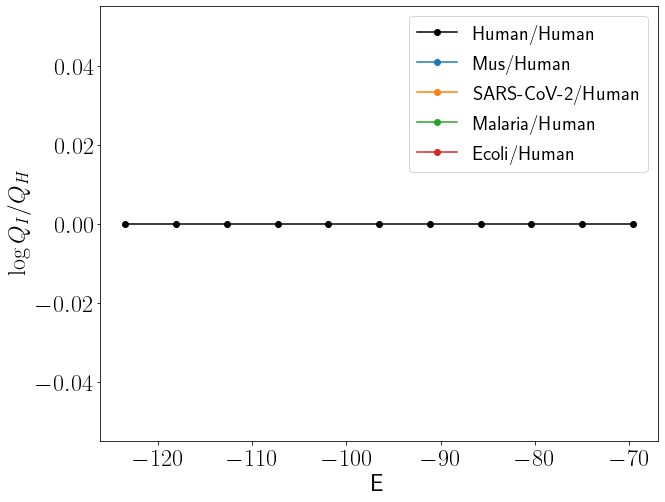

In [393]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot((data[1][:-1]), np.log(data[0][0]/data[0][0]), linestyle = '-', marker = 'o', label = 'Human/Human',color='black')
ax.plot((data[1][:-1]), np.log(data[0][1]/data[0][0]), linestyle = '-', marker = 'o', label = 'Mus/Human')
#ax.plot((data[1][:-1]), np.log(data[0][2]/data[0][0]), linestyle = '-', marker = 'o', label = 'Influenza A/Human')
ax.plot((data[1][:-1]), np.log(data[0][3]/data[0][0]), linestyle = '-', marker = 'o', label = 'SARS-CoV-2/Human')
ax.plot((data[1][:-1]), np.log(data[0][4]/data[0][0]), linestyle = '-', marker = 'o', label = 'Malaria/Human')
ax.plot((data[1][:-1]), np.log(data[0][5]/data[0][0]), linestyle = '-', marker = 'o', label = 'Ecoli/Human')
#ax.plot((data[1][:-1]), np.log(data[0][6]/data[0][0]), linestyle = '-', marker = 'o', label = 'HIV/Human')
ax.legend(fontsize = 20);
my_plot_layout(ax=ax, ylabel = r'$\log{Q_I/Q_H}$', xlabel = r'E')
fig.savefig('../Figures/8_Antigenicity/first_signature3_5.pdf')
